In [12]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

In [13]:
# Find out your current working directory
#import os
#print(os.getcwd())

# Out: /Users/shane/Documents/blog

# Display all of the files found in your current working directory
#print(os.listdir(os.getcwd()))

In [14]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


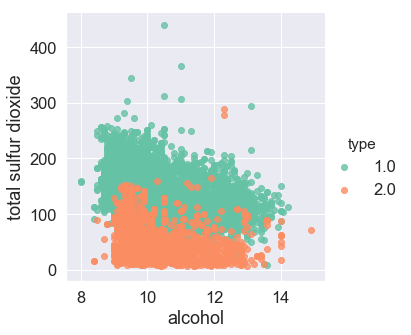

In [15]:
#plotting two features as a visualization
#sns.lmplot ('fixed acidity', 'residual sugar', data = wine, hue = 'type', palette = 'Set1', fit_reg = False )
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [16]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0      1.0            7.0             0.270         0.36           20.70   
 1      1.0            6.3             0.300         0.34            1.60   
 2      1.0            8.1             0.280         0.40            6.90   
 3      1.0            7.2             0.230         0.32            8.50   
 4      1.0            7.2             0.230         0.32            8.50   
 5      1.0            8.1             0.280         0.40            6.90   
 6      1.0            6.2             0.320         0.16            7.00   
 7      1.0            7.0             0.270         0.36           20.70   
 8      1.0            6.3             0.300         0.34            1.60   
 9      1.0            8.1             0.220         0.43            1.50   
 10     1.0            8.1             0.270         0.41            1.45   
 11     1.0            8.6             0.230         0.40            4.20   

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4330, 12)
(2134, 12)
(4330,)
(2134,)


In [18]:
from sklearn.preprocessing import StandardScaler
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_train.mean())
print(X_train.shape)
print(y_train.shape)

[[ 1.7552936   1.6341593  -0.11161862 ...  0.40402967  1.75607443
   0.18196053]
 [-0.56970526 -0.79518963 -0.53830049 ... -0.16207381  1.15112569
  -0.0708264 ]
 [-0.56970526  0.53703398 -1.33070967 ... -0.2249742  -0.3948544
   0.09769822]
 ...
 [-0.56970526  0.45866788  0.55888145 ... -0.47657575 -1.20145271
   0.68753439]
 [-0.56970526 -0.63845744 -0.96498235 ...  0.21532851 -1.20145271
   0.01343591]
 [-0.56970526 -0.40335916  0.98556331 ...  0.65563122  0.07566128
  -0.74492487]]
1.8430898753992746e-15
(4330, 12)
(4330,)


In [19]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [5]
 [6]
 ...
 [6]
 [6]
 [5]]
[[6]
 [6]
 [6]
 ...
 [5]
 [5]
 [5]]
(2134, 1)
(4330, 1)


In [20]:
#fitting the model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[5 6 6 ... 6 6 5]
[[6]
 [6]
 [6]
 ...
 [5]
 [5]
 [5]]


In [22]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   8   4   0   0]
 [  0   1  43  20   1   0]
 [  0   0 445 283   0   0]
 [  0   0 182 700  30   0]
 [  0   0  11 251  75   0]
 [  0   0   0  62  18   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       1.00      0.02      0.03        65
           5       0.65      0.61      0.63       728
           6       0.53      0.77      0.63       912
           7       0.60      0.22      0.33       337
           8       0.00      0.00      0.00        80

   micro avg       0.57      0.57      0.57      2134
   macro avg       0.46      0.27      0.27      2134
weighted avg       0.57      0.57      0.53      2134

0.5721649484536082


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#for label "5"
tp_5 = confusion_matrix(y_test,y_pred)[2,2]
fp_5 = np.sum(confusion_matrix(y_test,y_pred)[2,:]) - tp_5
prec = tp_5 / (tp_5 + fp_5)
print(tp_5)
print(fp_5)
print(prec)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(rms)
print(mae)